# Lending Club Case study

## Imports

In [385]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')

## Data Understanding

### Read the data

In [386]:
df = pd.read_csv('loan.csv', low_memory=False)

In [387]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [388]:
df.shape

(39717, 111)

### Since there are too many columns to analyse let's first do some cleaning before analysing the data types and statistics

## Data Cleaning

### Remove fully NULL columns
#### Since there are too many columns to analyse let's first remove the columns with all NULLs

In [389]:
df_v1 = df.loc[:, ~df.isnull().all()]

### New shape

In [392]:
df_v1.shape

(39717, 57)

### Remove columns with more than 80% NULLs

#### Find the percentage of NULLs in each column

In [393]:
round((df_v1.isnull().sum()/df_v1.shape[0])*100, 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

#### Drop columns [next_pymnt_d, mths_since_last_record] since they have more than 90% NULLs

In [394]:
df_v2 = df_v1.drop(['next_pymnt_d', 'mths_since_last_record'], axis=1)

### Get rid of columns with no use

* id
* member_id
* url
* desc
* title
* zip_code
* emp_title

In [395]:
df_v3 = df_v2.drop(['id'], axis=1)
df_v3 = df_v3.drop(['member_id'], axis=1)
df_v3 = df_v3.drop(['url'], axis=1)
df_v3 = df_v3.drop(['desc'], axis=1)
df_v3 = df_v3.drop(['title'], axis=1)
df_v3 = df_v3.drop(['zip_code'], axis=1)
df_v3 = df_v3.drop(['emp_title'], axis=1)

### Remove columns which have constant values and convey no information 

* policy code has values 1
* tax_liens has 0.0 and nulls
* delinq_amnt has 0
* application_type has 'INDIVIDUAL'
* chargeoff_within_12_mths has 0.0
* collections_12_mths_ex_med has 0.0
* acc_now_delinq has 0.0
* initial_list_status has 'f'
* pymnt_plan has 'n'

In [396]:
df_v4 = df_v3.drop(['policy_code'], axis=1)
df_v4 = df_v4.drop(['tax_liens'], axis=1)
df_v4 = df_v4.drop(['delinq_amnt'], axis=1)
df_v4 = df_v4.drop(['application_type'], axis=1)
df_v4 = df_v4.drop(['chargeoff_within_12_mths'], axis=1)
df_v4 = df_v4.drop(['collections_12_mths_ex_med'], axis=1)
df_v4 = df_v4.drop(['acc_now_delinq'], axis=1)
df_v4 = df_v4.drop(['initial_list_status'], axis=1)
df_v4 = df_v4.drop(['pymnt_plan'], axis=1)

### The Three types of column categories found here are:
* Demographics
* Loan characteristics
* Customer behaviour variables

### Let's get rid of customer behaviour variables since we cannot use them for analytics

* delinq_2yrs
* mths_since_last_delinq
* revol_bal
* revol_util
* out_prncp
* out_prncp_inv
* total_pymnt
* total_pymnt_inv 
* total_rec_prncp
* total_rec_int
* total_rec_late_fee
* recoveries
* collection_recovery_fee
* last_pymnt_d
* last_pymnt_amnt
* last_credit_pull_d

In [397]:
df_v4 = df_v4.drop(['delinq_2yrs'], axis=1)
df_v4 = df_v4.drop(['mths_since_last_delinq'], axis=1)
df_v4 = df_v4.drop(['revol_bal'], axis=1)
df_v4 = df_v4.drop(['revol_util'], axis=1)
df_v4 = df_v4.drop(['out_prncp'], axis=1)
df_v4 = df_v4.drop(['out_prncp_inv'], axis=1)
df_v4 = df_v4.drop(['total_pymnt'], axis=1)
df_v4 = df_v4.drop(['total_pymnt_inv'], axis=1)
df_v4 = df_v4.drop(['total_rec_prncp'], axis=1)
df_v4 = df_v4.drop(['total_rec_int'], axis=1)
df_v4 = df_v4.drop(['total_rec_late_fee'], axis=1)
df_v4 = df_v4.drop(['recoveries'], axis=1)
df_v4 = df_v4.drop(['collection_recovery_fee'], axis=1)
df_v4 = df_v4.drop(['last_pymnt_d'], axis=1)
df_v4 = df_v4.drop(['last_pymnt_amnt'], axis=1)
df_v4 = df_v4.drop(['last_credit_pull_d'], axis=1)

### Create a new copy for Row cleaning

In [398]:
df_v5 = df_v4.copy()

### Shape before row changes

In [399]:
df_v5.shape

(39717, 23)

### Remove fully NULL rows

In [400]:
df_v5 = df_v5.dropna(how='all', axis=0)

### Remove rows with NULL emp_length and pub_rec_bankruptcies

In [401]:
df_v5 = df_v5[~df_v5.emp_length.isnull()]

In [402]:
df_v5 = df_v5[~df_v5.pub_rec_bankruptcies.isnull()]

### convert emp_length to int

In [403]:
df_v5.emp_length = df_v5.emp_length.apply(lambda x: 0 if x.split(" ")[0]=='<' else int(x.split(" ")[0].rstrip("+")))

### Get rid of columns with 'current' as 'loan_status' and convert the status to numeric data

In [406]:
df_v5 = df_v5[~df_v5.loan_status.isin(['Current'])]

### Final shape after Row cleaning

In [407]:
df_v5.shape

(36847, 23)

### Percentage of missing data after cleaning

In [408]:
round((df_v5.isnull().sum()/df_v5.shape[0])*100, 2)

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
earliest_cr_line        0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
total_acc               0.0
pub_rec_bankruptcies    0.0
dtype: float64

### Percentage of Data Lost

In [409]:
(1 - df_v5.shape[0]/df.shape[0])*100

7.2261248331948575

### Analyse the data types
* Categorical data - object type
* Numerical data - int, float type

In [410]:
df_v5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36847 entries, 0 to 39680
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36847 non-null  int64  
 1   funded_amnt           36847 non-null  int64  
 2   funded_amnt_inv       36847 non-null  float64
 3   term                  36847 non-null  object 
 4   int_rate              36847 non-null  object 
 5   installment           36847 non-null  float64
 6   grade                 36847 non-null  object 
 7   sub_grade             36847 non-null  object 
 8   emp_length            36847 non-null  int64  
 9   home_ownership        36847 non-null  object 
 10  annual_inc            36847 non-null  float64
 11  verification_status   36847 non-null  object 
 12  issue_d               36847 non-null  object 
 13  loan_status           36847 non-null  object 
 14  purpose               36847 non-null  object 
 15  addr_state         

### Remove '%' in interest rate and convert to numeric type

In [411]:
df_v5.int_rate = df_v5.int_rate.apply(lambda x: float(x.rstrip("%")))

### Create derived column 'defaulted' from 'loan_status' for default/non-default cases

In [412]:
df_v5['defaulted'] = df_v5.loan_status.apply(lambda x: 1 if x=='Charged Off' else 0)

In [413]:
df_v5 = df_v5.drop(['loan_status'], axis=1)

### Create derived column for issue month, date and earlieat cr line month, date

In [414]:
df_v5["issue_d_month"] = df_v5.issue_d.apply(lambda x : x.split("-")[0])
df_v5["issue_d_year"] = df_v5.issue_d.apply(lambda x : x.split("-")[1])

df_v5["earliest_cr_line_month"] = df_v5.earliest_cr_line.apply(lambda x : x.split("-")[0])
df_v5["earliest_cr_line_year"] = df_v5.earliest_cr_line.apply(lambda x : x.split("-")[1])

In [415]:
df_v5 = df_v5.drop(["issue_d", "earliest_cr_line"], axis = 1)

## Data Analytics

In [416]:
df_master = df_v5.copy()

In [417]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36847 entries, 0 to 39680
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               36847 non-null  int64  
 1   funded_amnt             36847 non-null  int64  
 2   funded_amnt_inv         36847 non-null  float64
 3   term                    36847 non-null  object 
 4   int_rate                36847 non-null  float64
 5   installment             36847 non-null  float64
 6   grade                   36847 non-null  object 
 7   sub_grade               36847 non-null  object 
 8   emp_length              36847 non-null  int64  
 9   home_ownership          36847 non-null  object 
 10  annual_inc              36847 non-null  float64
 11  verification_status     36847 non-null  object 
 12  purpose                 36847 non-null  object 
 13  addr_state              36847 non-null  object 
 14  dti                     36847 non-null

### Univariate Analysis

* distribution
* barplots

### Distribution of default and non-default

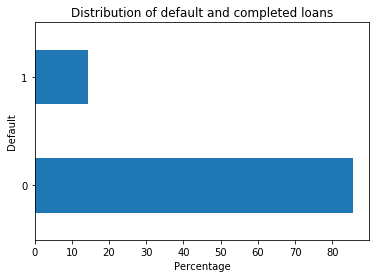

In [418]:
df_master.defaulted.value_counts(sort=False, normalize=True).mul(100).plot.barh()
plt.xlabel('Percentage')
plt.ylabel('Default')
plt.title('Distribution of default and completed loans')
plt.show()

**Inference:** We can conclude that more than 80% paid back the loan and less than 20% defaulted

### Let's create a dictionary for Default Rate Range of all potential predictors

In [482]:
DR_range={}

### Let's create a common function to find the range of default rate for a column

In [483]:
def calc_range(df, idx, val):
    return (df.groupby(idx)[val].mean().max()-df.groupby(idx)[val].mean().min())*100

### Loan Amount Vs Default cases

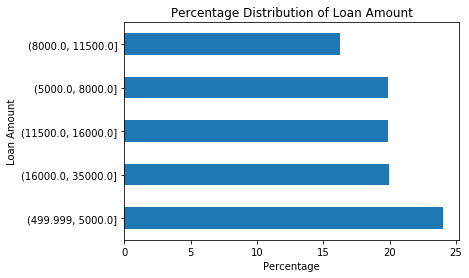

In [484]:
out = pd.qcut(df_master.loan_amnt, q=5)
plt.title('Percentage Distribution of Loan Amount')
out.value_counts(sort=True, normalize=True).mul(100).plot.barh()
plt.xlabel('Percentage')
plt.ylabel('Loan Amount')
plt.show()

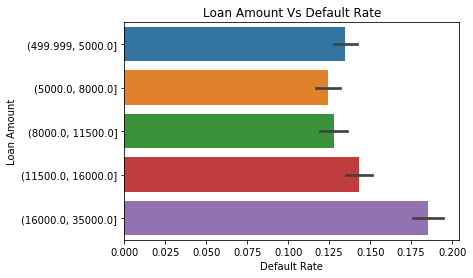

In [485]:
out = pd.qcut(df_master.loan_amnt, q=5)
plt.title('Loan Amount Vs Default Rate')
ax = sns.barplot(data=df_master, y=out, x='defaulted', estimator=np.mean)
ax.set(xlabel='Default Rate', ylabel='Loan Amount')
plt.show()

### Range of Default Rate

In [486]:
out = pd.qcut(df_master.loan_amnt, q=5)
DR_range['loan_amnt'] = calc_range(df_master, out, 'defaulted')

**Inference:** The possibility of default is more when the Loan amount is more than 16000. 
The variation of default range is DR_range['loan_amnt']

In [487]:
DR_range['loan_amnt']

6.077372072476573

### Purpose Vs Default cases

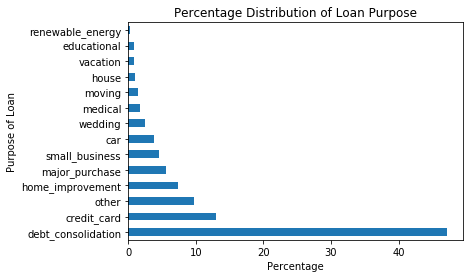

In [488]:
plt.title('Percentage Distribution of Loan Purpose')
df_master.purpose.value_counts(sort=True, normalize=True).mul(100).plot.barh()
plt.xlabel('Percentage')
plt.ylabel('Purpose of Loan')
plt.show()

**Inference:** More than 40% loans have been disbursed to debt_consolidation

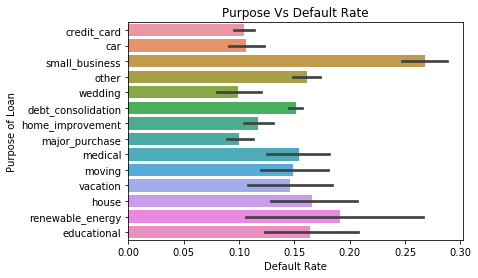

In [489]:
plt.title('Purpose Vs Default Rate')
sns.barplot(data=df_master, y='purpose', x='defaulted', estimator=np.mean)
plt.xlabel('Default Rate')
plt.ylabel('Purpose of Loan')
plt.show()

### Range of Default Rate

In [490]:
DR_range['purpose'] = calc_range(df_master, 'purpose', 'defaulted')

**Inference:** Maximum defaults occurred in small business. We can see that on average the percentage of default rate lies between 10-15%. But for small business it shoots up to more than 25%.The range of variation is in DR_range['purpose']

In [491]:
DR_range['purpose']

16.840156127013184

### Interest Rate Vs Default Cases

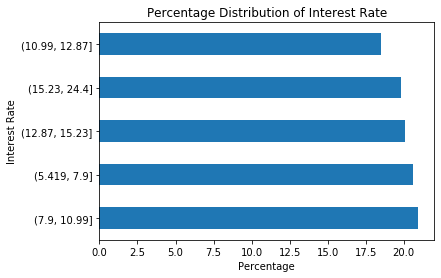

In [492]:
plt.title('Percentage Distribution of Interest Rate')
out = pd.qcut(df_master.int_rate, q=5)
out.value_counts(sort=True, normalize=True).mul(100).plot.barh()
plt.xlabel('Percentage')
plt.ylabel('Interest Rate')
plt.show()

**Inference:** Looks like loan has been disbursed approximately uniform way across different interest rates

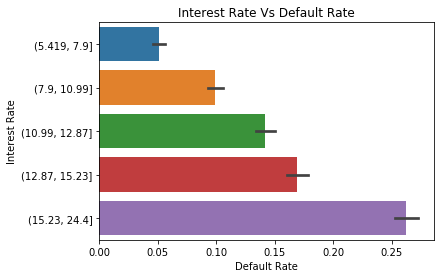

In [493]:
plt.title('Interest Rate Vs Default Rate')
out = pd.qcut(df_master.int_rate, q=5)
sns.barplot(data=df_master, y=out, x='defaulted', estimator=np.mean)
plt.xlabel('Default Rate')
plt.ylabel('Interest Rate')
plt.show()

### Range of Default Rate

In [494]:
out = pd.qcut(df_master.int_rate, q=5)
DR_range['int_rate'] = calc_range(df_master, out, 'defaulted')

**Inference:** Maximum defaults occurred when interest rate is higher. The variation is given by DR_range['int_rate']

In [495]:
DR_range['int_rate']

21.133700190976178

### Employment length Vs Default cases

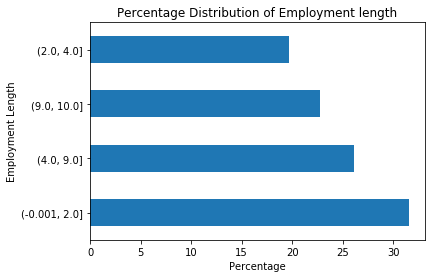

In [496]:
plt.title('Percentage Distribution of Employment length')
out = pd.qcut(df_master.emp_length, q=4)
out.value_counts(sort=True, normalize=True).mul(100).plot.barh()
plt.xlabel('Percentage')
plt.ylabel('Employment Length')
plt.show()

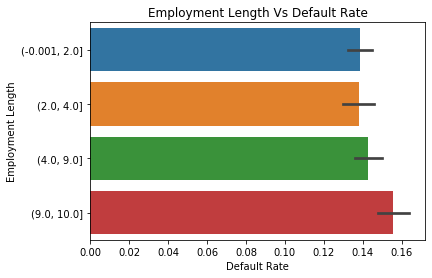

In [497]:
plt.title('Employment Length Vs Default Rate')
out = pd.qcut(df_master.emp_length, q=4)
sns.barplot(data=df_master, y=out, x='defaulted', estimator=np.mean)
plt.xlabel('Default Rate')
plt.ylabel('Employment Length')
plt.show()

### Range of Default Rate

In [498]:
out = pd.qcut(df_master.emp_length, q=4)
DR_range['emp_length'] = calc_range(df_master, out, 'defaulted')

**Inference:** If the employee has more employment length then default is more. The variation is given by DR_range['emp_length']

In [499]:
DR_range['emp_length']

1.786250543040027

### Term Vs Default Cases

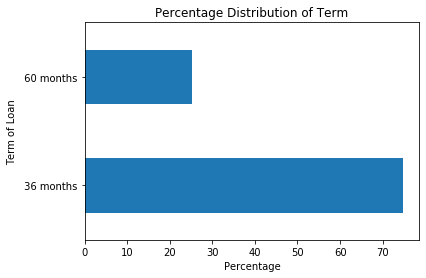

In [500]:
plt.title('Percentage Distribution of Term')
df_master.term.value_counts(sort=True, normalize=True).mul(100).plot.barh()
plt.xlabel('Percentage')
plt.ylabel('Term of Loan')
plt.show()

**Inference:** More than 70% loans have been disbursed with 36 months term

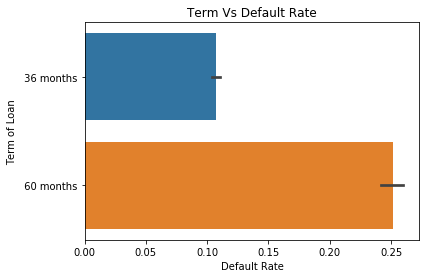

In [501]:
plt.title('Term Vs Default Rate')
sns.barplot(data=df_master, y='term', x='defaulted', estimator=np.mean)
plt.xlabel('Default Rate')
plt.ylabel('Term of Loan')
plt.show()

### Range of Default Rate

In [502]:
DR_range['term'] = calc_range(df_master, 'term', 'defaulted')

**Inference:** The Default rate for 60 months is significantly higher. The variation is given by DR_range['term']

In [503]:
DR_range['term']

14.416528651475918

### Installment Vs Default cases

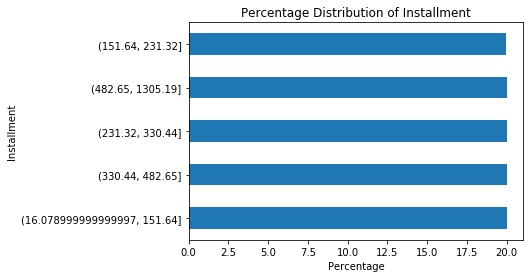

In [504]:
plt.title('Percentage Distribution of Installment')
out = pd.qcut(df_master.installment, q=5)
out.value_counts(sort=True, normalize=True).mul(100).plot.barh()
plt.xlabel('Percentage')
plt.ylabel('Installment')
plt.show()

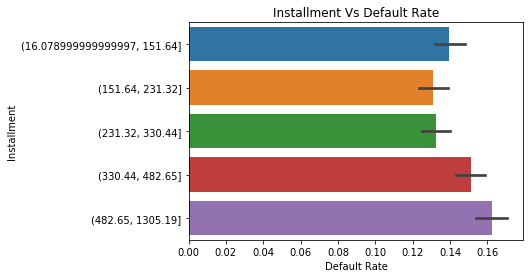

In [505]:
plt.title('Installment Vs Default Rate')
out = pd.qcut(df_master.installment, q=5)
sns.barplot(data=df_master, y=out, x='defaulted', estimator=np.mean)
plt.xlabel('Default Rate')
plt.ylabel('Installment')
plt.show()

### Range of Default Rate

In [507]:
out = pd.qcut(df_master.installment, q=5)
DR_range['installment'] = calc_range(df_master, out, 'defaulted')

**Inference:** If the installment increases then default rate slightly increases. The variation is given by DR_range['installment']

In [508]:
DR_range['installment']

3.151464186956246

### Grade Vs Default Cases

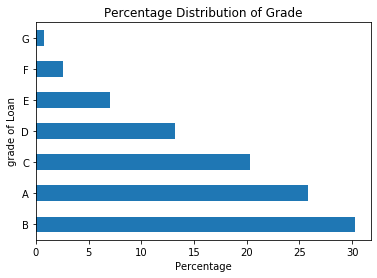

In [509]:
plt.title('Percentage Distribution of Grade')
df_master.grade.value_counts(sort=True, normalize=True).mul(100).plot.barh()
plt.xlabel('Percentage')
plt.ylabel('grade of Loan')
plt.show()

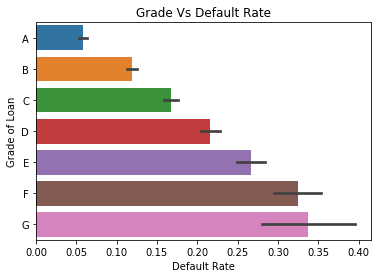

In [510]:
plt.title('Grade Vs Default Rate')
grade_order = df_master.grade.value_counts().sort_index().index
sns.barplot(data=df_master, y='grade', x='defaulted', estimator=np.mean, order=grade_order)
plt.xlabel('Default Rate')
plt.ylabel('Grade of Loan')
plt.show()

### Range of Default Rate

In [511]:
DR_range['grade'] = calc_range(df_master, 'grade', 'defaulted')

**Inference:** The variation is given by DR_range['grade'] 

In [512]:
DR_range['grade'] 

27.984246065775796

### Sub Grade Vs Default Cases

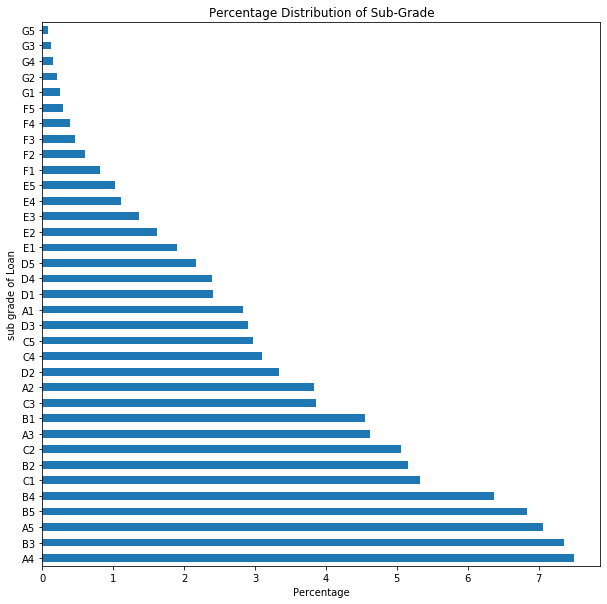

In [513]:
plt.figure(figsize=(10, 10))
plt.title('Percentage Distribution of Sub-Grade')
df_master.sub_grade.value_counts(sort=True, normalize=True).mul(100).plot.barh()
plt.xlabel('Percentage')
plt.ylabel('sub grade of Loan')
plt.show()

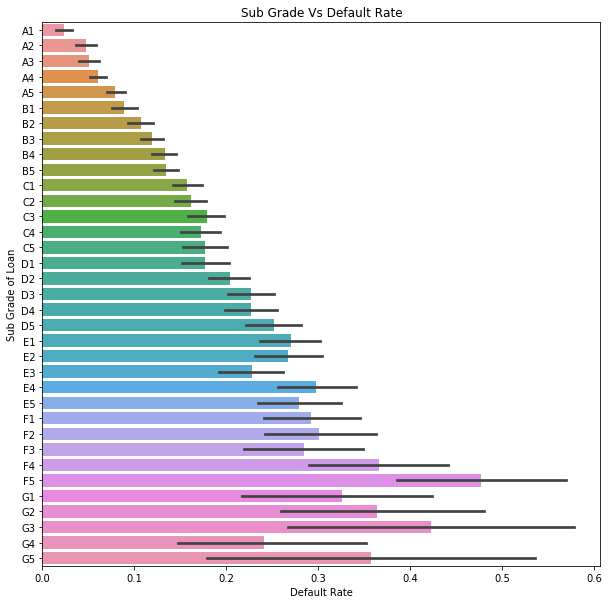

In [514]:
plt.figure(figsize=(10, 10))
plt.title('Sub Grade Vs Default Rate')
grade_order = df_master.sub_grade.value_counts(sort=False).sort_index().index
sns.barplot(data=df_master, y='sub_grade', x='defaulted', estimator=np.mean, order=grade_order)
plt.xlabel('Default Rate')
plt.ylabel('Sub Grade of Loan')
plt.show()

### Range of Default Rate

In [515]:
DR_range['sub_grade'] = calc_range(df_master, 'sub_grade', 'defaulted')

**Inference:** The variation is given by DR_range['sub_grade']

In [516]:
DR_range['sub_grade']

45.40094651402586

### Range of Default Rate - home_ownership

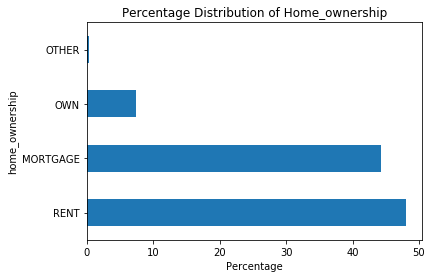

In [545]:
plt.title('Percentage Distribution of Home_ownership')
df_master.home_ownership.value_counts(sort=True, normalize=True).mul(100).plot.barh()
plt.xlabel('Percentage')
plt.ylabel('home_ownership')
plt.show()

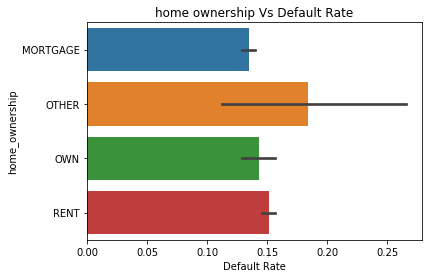

In [546]:
plt.title('home ownership Vs Default Rate')
home_ownership_order = df_master.home_ownership.value_counts().sort_index().index
sns.barplot(data=df_master, y='home_ownership', x='defaulted', estimator=np.mean, order=home_ownership_order)
plt.xlabel('Default Rate')
plt.ylabel('home_ownership')
plt.show()

In [547]:
DR_range['home_ownership'] = calc_range(df_master, 'home_ownership', 'defaulted')
DR_range['home_ownership']

4.912044974631841

### Range of Default Rate - annual_inc

In [518]:
out = pd.qcut(df_master.annual_inc, q=10)
DR_range['annual_inc'] = calc_range(df_master, out, 'defaulted')
DR_range['annual_inc']

7.643630444407908

### Range of Default Rate - verification_status

In [519]:
DR_range['verification_status'] = calc_range(df_master, 'verification_status', 'defaulted')
DR_range['verification_status']

4.207614764889131

### Range of Default Rate - addr_state

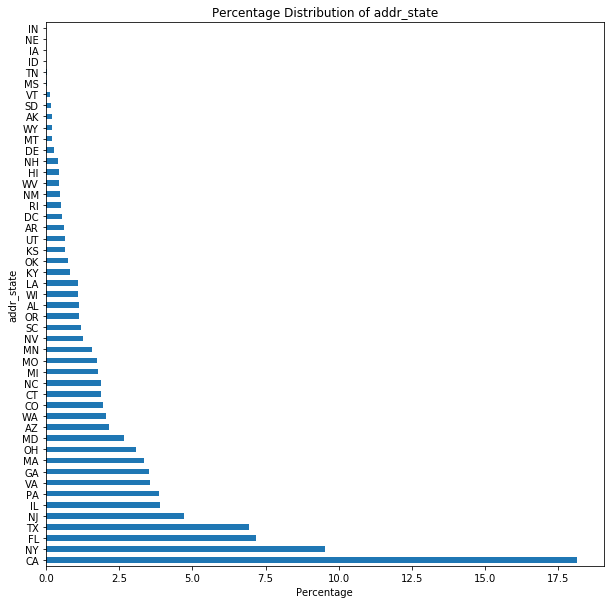

In [551]:
plt.figure(figsize=(10, 10))
plt.title('Percentage Distribution of addr_state')
df_master.addr_state.value_counts(sort=True, normalize=True).mul(100).plot.barh()
plt.xlabel('Percentage')
plt.ylabel('addr_state')
plt.show()

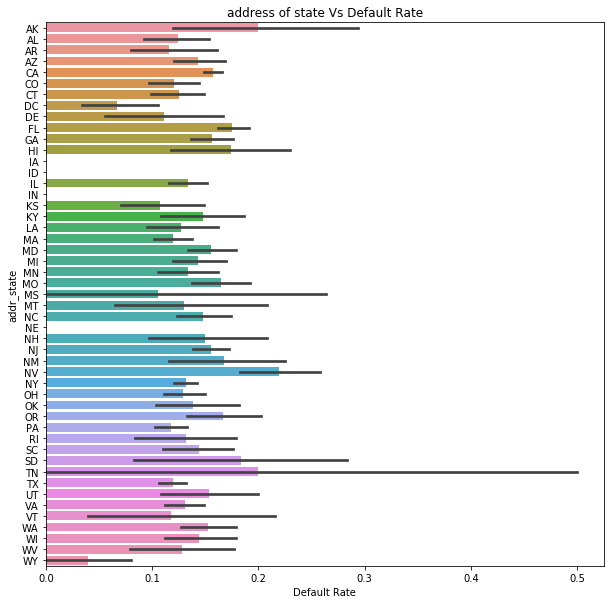

In [562]:
plt.figure(figsize=(10, 10))
plt.title('address of state Vs Default Rate')
addr_state_order = df_master.addr_state.value_counts().sort_index().index
sns.barplot(data=df_master, y='addr_state', x='defaulted', estimator=np.mean, order=addr_state_order)
plt.xlabel('Default Rate')
plt.ylabel('addr_state')
plt.show()

### Top Ten States with Defaults

In [639]:
df_master.groupby(df_master.addr_state).defaulted.mean().sort_values(ascending=False)[:10]

addr_state
NV    0.219089
AK    0.200000
TN    0.200000
SD    0.183333
FL    0.175246
HI    0.173913
NM    0.167630
OR    0.166265
MO    0.164319
CA    0.157218
Name: defaulted, dtype: float64

In [520]:
DR_range['addr_state'] = calc_range(df_master, 'addr_state', 'defaulted')
DR_range['addr_state']

21.908893709327547

### Range of Default Rate - dti

In [521]:
out = pd.qcut(df_master.dti, q=5)
DR_range['dti'] = calc_range(df_master, out, 'defaulted')
DR_range['dti']

4.381650569991377

### Range of Default Rate - inq_last_6mths

In [522]:
out = pd.qcut(df_master.inq_last_6mths, q=2)
DR_range['inq_last_6mths'] = calc_range(df_master, out, 'defaulted')
DR_range['inq_last_6mths']

4.437819739777982

### Range of Default Rate - open_acc

In [523]:
out = pd.qcut(df_master.open_acc, q=10)
DR_range['open_acc'] = calc_range(df_master, out, 'defaulted')
DR_range['open_acc']

3.154091319206054

### Range of Default Rate - pub_rec

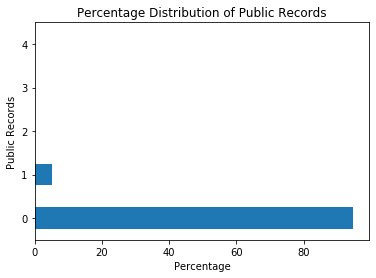

In [524]:
plt.title('Percentage Distribution of Public Records')
df_master.pub_rec.value_counts(sort=True, normalize=True).mul(100).plot.barh()
plt.xlabel('Percentage')
plt.ylabel('Public Records')
plt.show()

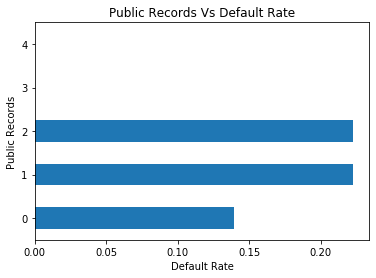

In [525]:
plt.title('Public Records Vs Default Rate')
df_master.groupby(df_master.pub_rec).defaulted.mean().plot.barh()
plt.xlabel('Default Rate')
plt.ylabel('Public Records')
plt.show()

In [526]:
DR_range['pub_rec'] = calc_range(df_master, df_master.pub_rec, 'defaulted')
DR_range['pub_rec']

22.269579115610018

### Range of Default Rate - total_acc

In [527]:
out = pd.qcut(df_master.total_acc, q=25)
DR_range['total_acc'] = calc_range(df_master, out, 'defaulted')
DR_range['total_acc']

5.996373337476241

### Range of Default Rate - pub_rec_bankruptcies

In [528]:
DR_range['pub_rec_bankruptcies'] = calc_range(df_master, df_master.pub_rec_bankruptcies, 'defaulted')
DR_range['pub_rec_bankruptcies']

25.99909379247848

### Range of Default Rate - issue date

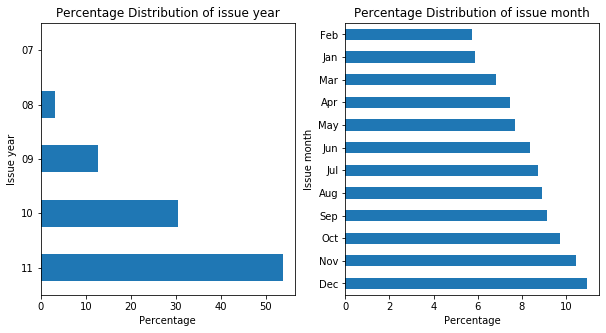

In [529]:
gs = gridspec.GridSpec(1, 2)
plt.figure(figsize=(10, 5))
plt.subplot(gs[0, 0])
plt.title('Percentage Distribution of issue year')
df_master.issue_d_year.value_counts(sort=True, normalize=True).mul(100).plot.barh()
plt.xlabel('Percentage')
plt.ylabel('Issue year')
plt.subplot(gs[0, 1])
plt.title('Percentage Distribution of issue month')
df_master.issue_d_month.value_counts(sort=True, normalize=True).mul(100).plot.barh()
plt.xlabel('Percentage')
plt.ylabel('Issue month')
plt.show()

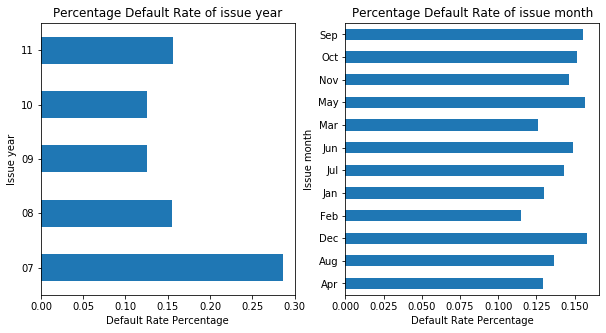

In [530]:
gs = gridspec.GridSpec(1, 2)
plt.figure(figsize=(10, 5))
plt.subplot(gs[0, 0])
plt.title('Percentage Default Rate of issue year')
df_master.groupby(df_master.issue_d_year).defaulted.mean().plot.barh()
plt.xlabel('Default Rate Percentage')
plt.ylabel('Issue year')
plt.subplot(gs[0, 1])
plt.title('Percentage Default Rate of issue month')
df_master.groupby(df_master.issue_d_month).defaulted.mean().sort_index().plot.barh()
plt.xlabel('Default Rate Percentage')
plt.ylabel('Issue month')
plt.show()

In [531]:
DR_range['issue_d_month'] = calc_range(df_master, df_master.issue_d_month, 'defaulted')
DR_range['issue_d_month']

4.292682549045676

### Range of Default Rate - Earliest CR Line

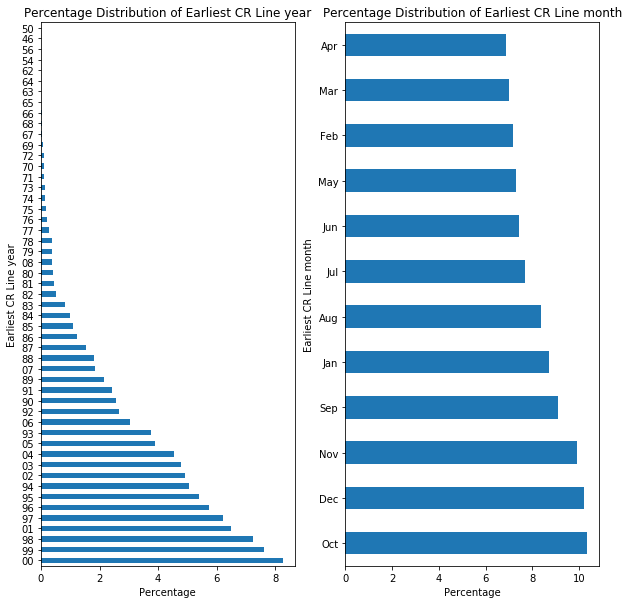

In [532]:
gs = gridspec.GridSpec(1, 2)
plt.figure(figsize=(10, 10))
plt.subplot(gs[0, 0])
plt.title('Percentage Distribution of Earliest CR Line year')
df_master.earliest_cr_line_year.value_counts(sort=True, normalize=True).mul(100).plot.barh()
plt.xlabel('Percentage')
plt.ylabel('Earliest CR Line year')
plt.subplot(gs[0, 1])
plt.title('Percentage Distribution of Earliest CR Line month')
df_master.earliest_cr_line_month.value_counts(sort=True, normalize=True).mul(100).plot.barh()
plt.xlabel('Percentage')
plt.ylabel('Earliest CR Line month')
plt.show()

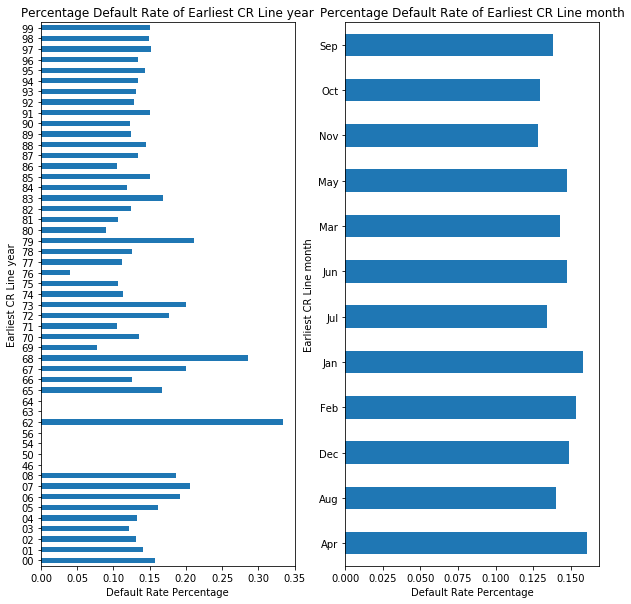

In [533]:
gs = gridspec.GridSpec(1, 2)
plt.figure(figsize=(10, 10))
plt.subplot(gs[0, 0])
plt.title('Percentage Default Rate of Earliest CR Line year')
df_master.groupby(df_master.earliest_cr_line_year).defaulted.mean().plot.barh()
plt.xlabel('Default Rate Percentage')
plt.ylabel('Earliest CR Line year')
plt.subplot(gs[0, 1])
plt.title('Percentage Default Rate of Earliest CR Line month')
df_master.groupby(df_master.earliest_cr_line_month).defaulted.mean().plot.barh()
plt.xlabel('Default Rate Percentage')
plt.ylabel('Earliest CR Line month')
plt.show()

In [534]:
DR_range['earliest_cr_line_month'] = calc_range(df_master, df_master.earliest_cr_line_month, 'defaulted')
DR_range['earliest_cr_line_month']

3.2284539326367767

### Sorting of dictionary for Predictors

In [535]:
DR_range

{'loan_amnt': 6.077372072476573,
 'purpose': 16.840156127013184,
 'int_rate': 21.133700190976178,
 'emp_length': 1.786250543040027,
 'term': 14.416528651475918,
 'installment': 3.151464186956246,
 'grade': 27.984246065775796,
 'sub_grade': 45.40094651402586,
 'home_ownership': 4.912044974631841,
 'annual_inc': 7.643630444407908,
 'verification_status': 4.207614764889131,
 'addr_state': 21.908893709327547,
 'dti': 4.381650569991377,
 'inq_last_6mths': 4.437819739777982,
 'open_acc': 3.154091319206054,
 'pub_rec': 22.269579115610018,
 'total_acc': 5.996373337476241,
 'pub_rec_bankruptcies': 25.99909379247848,
 'issue_d_month': 4.292682549045676,
 'earliest_cr_line_month': 3.2284539326367767}

In [536]:
 {k: v for k, v in sorted(DR_range.items(), key=lambda item: item[1])}

{'emp_length': 1.786250543040027,
 'installment': 3.151464186956246,
 'open_acc': 3.154091319206054,
 'earliest_cr_line_month': 3.2284539326367767,
 'verification_status': 4.207614764889131,
 'issue_d_month': 4.292682549045676,
 'dti': 4.381650569991377,
 'inq_last_6mths': 4.437819739777982,
 'home_ownership': 4.912044974631841,
 'total_acc': 5.996373337476241,
 'loan_amnt': 6.077372072476573,
 'annual_inc': 7.643630444407908,
 'term': 14.416528651475918,
 'purpose': 16.840156127013184,
 'int_rate': 21.133700190976178,
 'addr_state': 21.908893709327547,
 'pub_rec': 22.269579115610018,
 'pub_rec_bankruptcies': 25.99909379247848,
 'grade': 27.984246065775796,
 'sub_grade': 45.40094651402586}

## The following columns are identified as Predictors

* sub_grade *(categorical)*
* grade *(categorical)*
* pub_rec_bankruptcies
* pub_rec
* addr_state *(categorical)*
* int_rate
* purpose *(categorical)*
* term *(categorical)*

## Bivariate Analysis

* scatterplots
* pairplots
* heatmaps

### Let's Get correlation matrix for all the predictors we identified

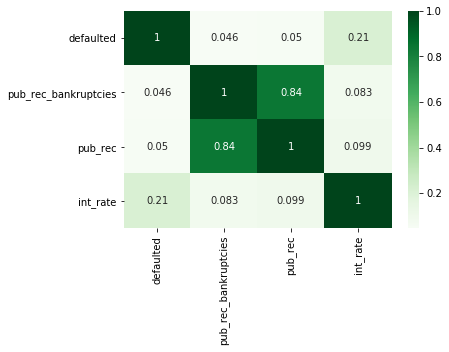

In [570]:
pred = df_master.loc[:, ['defaulted', 'grade', 'sub_grade', 'pub_rec_bankruptcies', 'pub_rec', 'addr_state', 'int_rate', 'purpose', 'term'] ]
df_corr =pred.corr()
sns.heatmap(df_corr, cmap="Greens", annot=True)
plt.show()

 ***
 **Inference:** Looks like pub_rec_bankruptcies and pub_rec are highly correlated. Let's confirm this.
 ***

### Pearson’s correlation

Using Pearson’s correlation coefficient to evaluate the relationship between two predictors.

In [572]:
from scipy.stats import pearsonr

def calculatePearsonsCorrelation(data_frame, x, y):
    corr = pearsonr(data_frame[x], data_frame[y])
    print("Pearson's correlation between ",x+ " and ",y +" is: ",round(corr[0], 2))

In [573]:
# calculating Pearson's correlation for pub_rec_bankruptcies and pub_rec
calculatePearsonsCorrelation(df_master, "pub_rec_bankruptcies", "pub_rec")

Pearson's correlation between  pub_rec_bankruptcies and  pub_rec is:  0.84


***

**Inference :** 

* We can see that pub_rec_bankruptcies and pub_rec are positively correlated and that the correlation is 0.84. 
* This suggests a high level of correlation (value is between 0.5 and 1.0).
* We can discard pub_rec_bankruptcies from our top predictors and use pub_rec instead.

    
***

### Barplot Bivariate Analysis

In [627]:
# Creating function for bivariate barplot to identify the important combinations of driver variables.
def barplot_bivariate(df, x, y, hue):
    sns.barplot(x=x, y=y, hue=hue, data=df, estimator=np.mean)
    sns.set(rc={'figure.figsize':(10, 8)})
    plt.show()

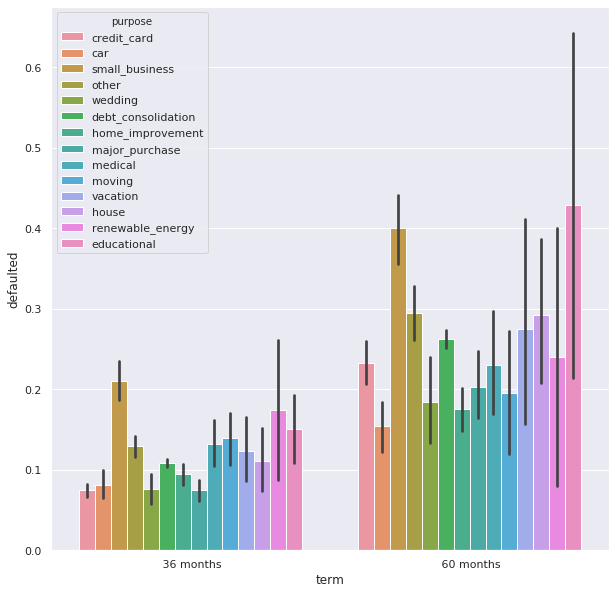

In [628]:
# Checking which purposes has high default rate for each term
barplot_bivariate(df_master, "term", 'defaulted', "purpose")

***

**Inference :**
* For term 36 months, maximum default rate is for small business followed by renewable energy and educational purpose.
* For term 60 months, maximum default rate is for educational purpose followed by small business, other and house purposes.

***

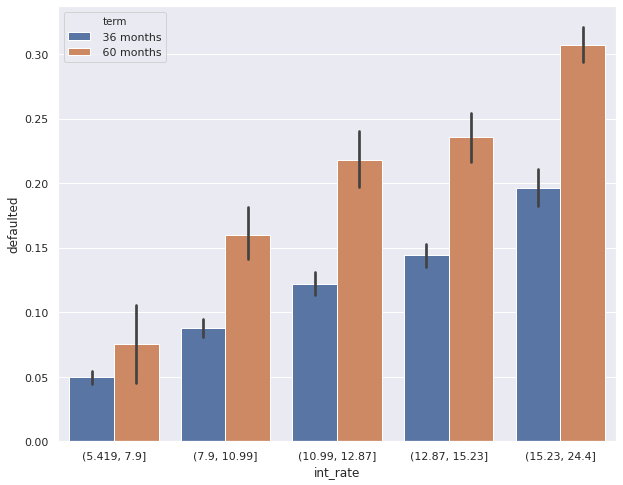

In [629]:
# Binning int_rate
int_rate_qcut = pd.qcut(df_master.int_rate, q=5)
# Checking if term has effect on default rate for each interest rate bins
barplot_bivariate(df_master, int_rate_qcut, 'defaulted', "term")

***

**Inference :**
* We can see that as interest rate increases, the default rate is increasing.
* For all buckets of interest rate, defaulting for 60 months term is significantly higher as compared to 36 months.
* For very high interest rate and term 60 months, default rate is highest.

***

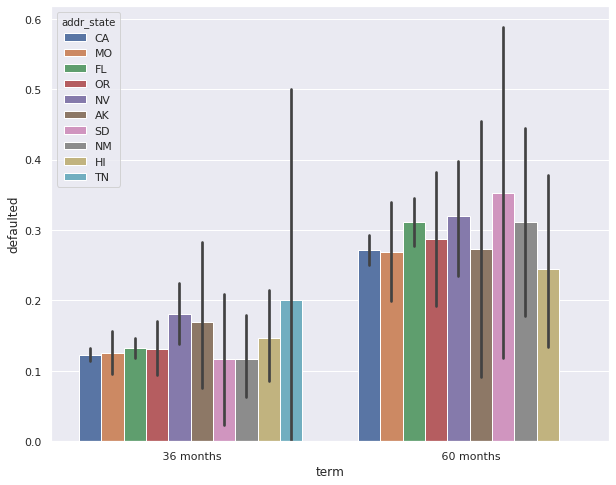

In [630]:
# Filtering data for top 10 Address States with highest default rate based on our previous analysis
# Top 10 States with highest default rates are : NV, AK, TN, SD, FL, HI, NM, OR, MO, CA
top_defaulted_states = ["NV", "AK", "TN", "SD", "FL", "HI", "NM", "OR", "MO", "CA"]
df_plot_top_default_states = df_master[df_master.addr_state.isin(top_defaulted_states)]

# Observing term wise effect on top 10 address rate with highest default rate
barplot_bivariate(df_plot_top_default_states, "term", 'defaulted', "addr_state")

***

**Inference :**
* Default rate for 60 months term is higher for top 10 states with highest default rate.
* For 36 months, State TN has highest default rate followed by NV and AK.
* For 60 months, State SD has highest default rate followed by NV and FL.
* NV comes in top 3 for both 36 months and 60 months term.


***

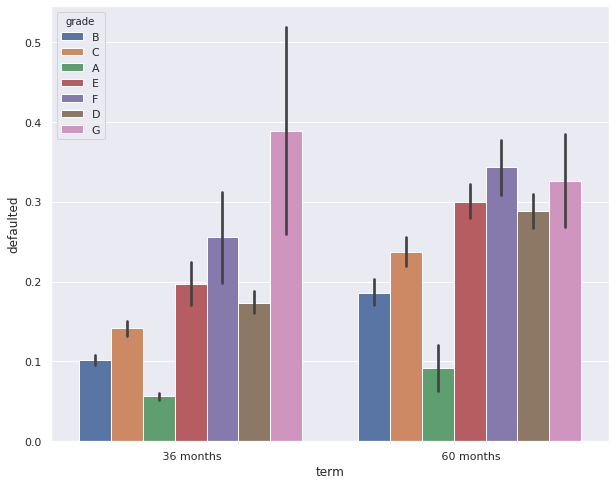

In [631]:
# Observing term wise effect of grades on default rate
barplot_bivariate(df_master, "term", 'defaulted', "grade")

***

**Inference :**
* Irrespective of term, Grades E, F and G come in top 3 grades with highest default rate.
* For 36 months term, Grade G has highest default rate followed by F and E.
* For 60 months term, Grade F has highest default rate followed by G and E.
***

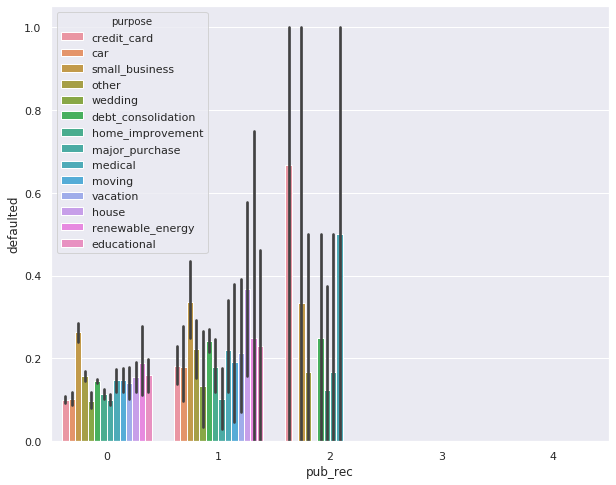

In [632]:
# Observing combined effect of number of derogatory public records and grades on default rate
barplot_bivariate(df_master, "pub_rec", 'defaulted',  "purpose")

***

**Inference :**
We dont see a definitive trend here for each purpose seperately across different numbers for public records. But we do see spikes in defaults especially if the loan has been issued for credit cards, small business, etc to an individual with larger number of derogatory records.

***

In [633]:
# Picking top 5 purpose with high default rate 
# Selecting based on our univariate and bivariate(term vs default rate with hue as purpose ) analysis

top_purposes_default_rate = ["small_business", "renewable_energy", "educational", "other", "house"]
df_plot_top_default_states_purpose = df_plot_top_default_states[df_plot_top_default_states.purpose.isin(top_purposes_default_rate)]

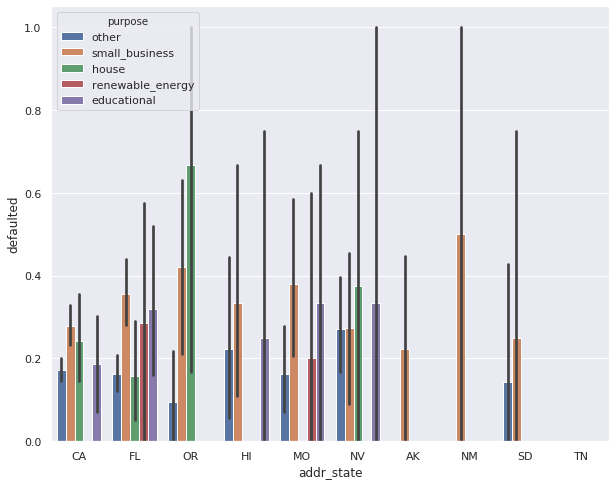

In [634]:
# Observing combined effect of top 10 address rate and top 5 purpose with highest default rate on default rate
barplot_bivariate(df_plot_top_default_states_purpose, "addr_state", "defaulted", "purpose")


***

**Inference :**

* Small business default rate is spiking in most of the states


***

## Recommendations

***

Based on the extensive analysis performed, we have the following recommendations to LC:

* **Important Predictors for default cases are**


    * sub_grade *(categorical)*
    * grade *(categorical)*
    * pub_rec
    * addr_state *(categorical)*
    * int_rate
    * purpose *(categorical)*
    * term *(categorical)* 
    
   
* **Inferences from Predictors**


    * Maximum defaults occur in loans disbursed for small business.
    * Maximum defaults occur when interest rates are higher especially if it is more than 15%.
    * The Default rate for 60 months term is significantly higher.
    * The default rate is more as the category of grades increase from A to G
    * The default rate is more as the category of sub grades increase from 1 to 5
    * The Default Rate is very low in states NE, IN, ID, IA and very high in states like NV, AK, TN, SD, FL.
    * For term 36 months, maximum default rate is for small business followed by renewable energy and educational purpose.
    * For term 60 months, maximum default rate is for educational purpose followed by small business, other and house purposes
    * For all buckets of interest rate, defaulting for 60 months term is significantly higher as compared to 36 months.
    * For very high interest rate and term 60 months, default rate is highest.
    * Default rate for 60 months term is higher for top 10 states with highest default rate.
    * For 36 months, State TN has highest default rate followed by NV and AK.
    * For 60 months, State SD has highest default rate followed by NV and FL.
    * NV comes in top 3 for both 36 months and 60 months term.
    * Irrespective of term, Grades E, F and G come in top 3 grades with highest default rate.
    * For 36 months term, Grade G has highest default rate followed by F and E.
    * For 60 months term, Grade F has highest default rate followed by G and E.
    * There are spikes in defaults especially if the loan has been issued for credit cards, small business, etc to an individual with larger number of derogatory records.

* **Closing Note**


    * sub_grade - lower the better 
    * grade - lower the better
    * pub_rec - Lower numbers to 0 are better
    * addr_state - better if they are NE, IN, ID, IA or other states with lesser defaults
    * int_rate - < 15%
    * purpose - Go for purposes like wedding, major purchase or other less risky ones.
    * term - go for 36 months since that seems less risky in many scenarios
***